# Continuous_probabilistic_methods

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [14]:
def get_lower_and_upper_bounds (series, multiplier=1.5):

    # calculate our q1 and q3
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    # calculare lower bound and upper bound
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    return lower_bound, upper_bound

In [15]:
def get_iqr(series, multiplier=1.5):

    # calculate our q1 and q3
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    return iqr

# 1. Using lemonade.csv dataset and focusing on continuous variables:

In [16]:
df = pd.read_csv('lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [17]:
df.isnull().sum()

Date           0
Day            0
Temperature    0
Rainfall       0
Flyers         0
Price          0
Sales          0
dtype: int64

In [18]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


### * Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [29]:
columns=['Temperature', 'Rainfall','Flyers','Price','Sales']
for col in columns:
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
    print(f'{col}--lower bound: {lower_bound}, upper bound: {upper_bound}')
    

Temperature--lower bound: 16.700000000000003, upper bound: 104.7
Rainfall--lower bound: 0.26, upper bound: 1.3
Flyers--lower bound: 4.0, upper bound: 76.0
Price--lower bound: 0.5, upper bound: 0.5
Sales--lower bound: 5.0, upper bound: 45.0


In [34]:
    
columns=['Temperature', 'Rainfall','Flyers','Price','Sales']
for col in columns:
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
    print(f'{col}--lower bound: {lower_bound}, upper bound: {upper_bound}')    
       
    lower = (df[(df[col])<lower_bound])
    print(lower)
    print('____________________')

Temperature--lower bound: 16.700000000000003, upper bound: 104.7
         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7
____________________
Rainfall--lower bound: 0.26, upper bound: 1.3
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
____________________
Flyers--lower bound: 4.0, upper bound: 76.0
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
____________________
Price--lower bound: 0.5, upper bound: 0.5
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
____________________
Sales--lower bound: 5.0, upper bound: 45.0
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
____________________


In [37]:
df[df.Flyers<4]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


**A negative number of Flyers does not make sense. Any negative number of flyers should not be kept.**

In [42]:
df[df.Temperature<16.7]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


**Temperature that is 15.1 makes sense and can be kept as an outlier**

The lower outlier that should be taken out is a negative number of flyers. All other lower bound outliers check out at this moment and should be kept.

### * Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [44]:
    
columns=['Temperature', 'Rainfall','Flyers','Price','Sales']
for col in columns:
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
    print(f'{col} upper bound: {upper_bound}')    
       
    upper = (df[(df[col]) > upper_bound])
    print(upper)
    print('____________________')

Temperature upper bound: 104.7
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
____________________
Rainfall upper bound: 1.3
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     14
19    1/20/17     

In [45]:
df[df.Temperature>104.7]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


**Temperature of 212 seems like a mistake and should not be kept as an outlier.**

In [47]:
df[df.Rainfall>1.3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


**Rainfall greater than 1.3 can be a normal occurance and outliers should be kept**

In [48]:
df[df.Flyers>76]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


**Flyers distributed greater than 76 can be a normal occurance and outliers should be kept.**

In [49]:
df[df.Sales>45]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


**Sales greater than 45 can occur.A sale of 524 seems unlikely but it is still probable. Outliers should be kept**

The upper limit outliers that should be taken out is a temperature of 212. All other outliers check out at this moment in time.

### * Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [53]:
columns=['Temperature', 'Rainfall','Flyers','Price','Sales']
for col in columns:
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col],3)
    print(f'{col}--lower bound: {lower_bound}')    
       
    lower = (df[(df[col])<lower_bound])
    print(lower)
    print('____________________')

Temperature--lower bound: -16.299999999999997
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
____________________
Rainfall--lower bound: -0.13
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
____________________
Flyers--lower bound: -23.0
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
____________________
Price--lower bound: 0.5
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
____________________
Sales--lower bound: -10.0
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
____________________


**Using a multiplier of 3 , Flyers as a negative number does not make sense in the real world and should be taken out as an outlier of the dataset.**

### * Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [54]:
columns=['Temperature', 'Rainfall','Flyers','Price','Sales']
for col in columns:
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col],3)
    print(f'{col}--upper bound: {upper_bound}')    
       
    lower = (df[(df[col])>upper_bound])
    print(lower)
    print('____________________')

Temperature--upper bound: 137.7
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
____________________
Rainfall--upper bound: 1.69
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
____________________
Flyers--upper bound: 103.0
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
____________________
Price--upper bound: 0.5
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
____________________
Sales--upper bound: 60.0
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59   

**When 3 is used as a multiplier fo the upper bound the only outlier that does not check out is temperature at 212 all other outliers are part of the real world.Temperature outliers should be taken out and all others can be kept at this moment.**

## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

* Use a 2 sigma decision rule to isolate the outliers.

    * Do these make sense?
    * Should certain outliers be kept or removed?

In [ ]:
# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
x[zscores.abs() >= 2]

# Finds all of the observations three standard deviations or more
x[zscores.abs() >= 3]

Temperature


,Temperature
0,-1.892340
1,-1.787286
2,-1.477652
3,-0.946852
4,-1.040848
...,...
360,-1.024260
361,-1.295189
362,-1.201194
363,-1.676702


,Temperature
41,212.0
166,99.3
176,102.6
181,102.9
190,98.0
198,99.3
202,99.6
207,97.9
338,22.0
364,15.1


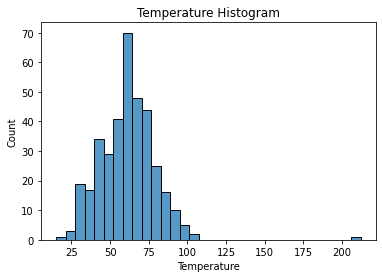

Rainfall


,Rainfall
0,4.286488
1,1.840253
2,1.840253
3,0.817946
4,0.635391
...,...
360,0.635391
361,1.548165
362,1.548165
363,2.205363


,Rainfall
0,2.00
5,1.54
6,1.54
10,1.54
15,1.67
16,1.43
19,1.43
23,1.54
337,1.54
338,1.82


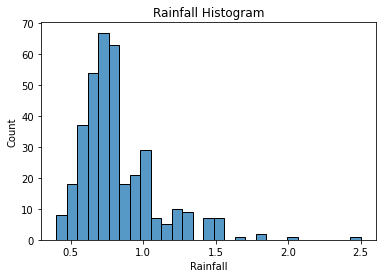

Flyers


,Flyers
0,-1.820927
1,-1.820927
2,-0.950507
3,-0.877972
4,-0.515297
...,...
360,-0.515297
361,-0.587832
362,-1.675857
363,-1.313182


,Flyers
166,77
170,70
171,76
182,68
183,68
194,80
198,76
203,72
204,69
207,74


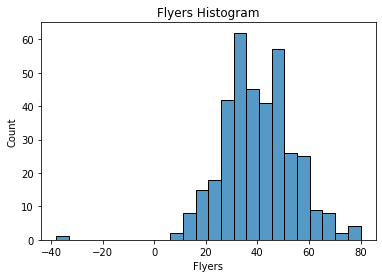

Price


,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
360,NaN
361,NaN
362,NaN
363,NaN


,Price


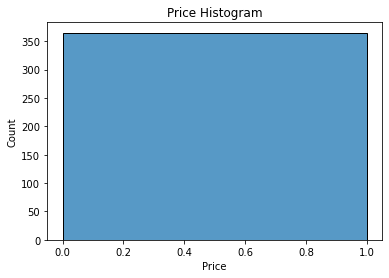

Sales


,Sales
0,-0.577281
1,-0.480344
2,-0.415720
3,-0.351096
4,-0.318783
...,...
360,-0.286471
361,-0.383408
362,-0.415720
363,-0.480344


,Sales
181,143
182,158
183,235
184,534


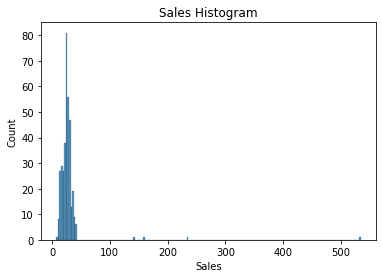

In [96]:
# Z scores greater than 2
for col in columns:
    print(col)
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    display(pd.DataFrame(z_scores))
    df['zscores'] = z_scores
    display(pd.DataFrame(df[df['zscores'].abs() >=2][col]))
    sns.histplot(df[col])
    plt.title(f'{col} Histogram' )
    plt.show();

**With Z-score set to 2 some values that are outside of this bound seem likely and a few seem unlikely.**

# 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

Temperature


,Temperature
0,-1.892340
1,-1.787286
2,-1.477652
3,-0.946852
4,-1.040848
...,...
360,-1.024260
361,-1.295189
362,-1.201194
363,-1.676702


,Temperature
41,212.0


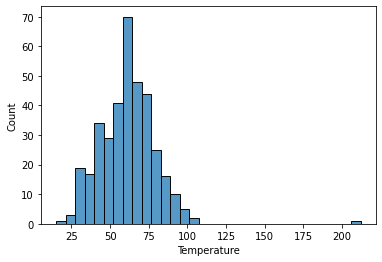

Rainfall


,Rainfall
0,4.286488
1,1.840253
2,1.840253
3,0.817946
4,0.635391
...,...
360,0.635391
361,1.548165
362,1.548165
363,2.205363


,Rainfall
0,2.00
15,1.67
338,1.82
343,1.82
364,2.50


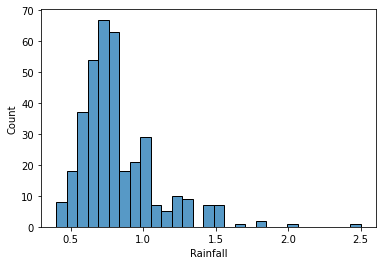

Flyers


,Flyers
0,-1.820927
1,-1.820927
2,-0.950507
3,-0.877972
4,-0.515297
...,...
360,-0.515297
361,-0.587832
362,-1.675857
363,-1.313182


,Flyers
324,-38


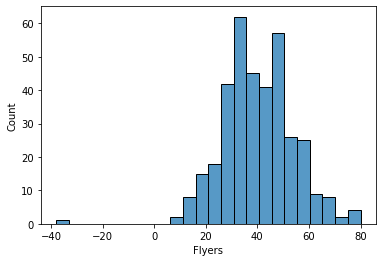

Price


,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
360,NaN
361,NaN
362,NaN
363,NaN


,Price


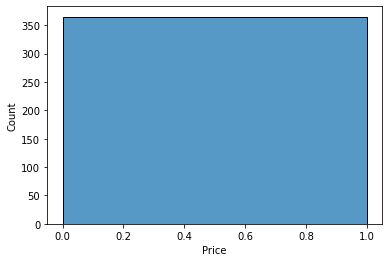

Sales


,Sales
0,-0.577281
1,-0.480344
2,-0.415720
3,-0.351096
4,-0.318783
...,...
360,-0.286471
361,-0.383408
362,-0.415720
363,-0.480344


,Sales
181,143
182,158
183,235
184,534


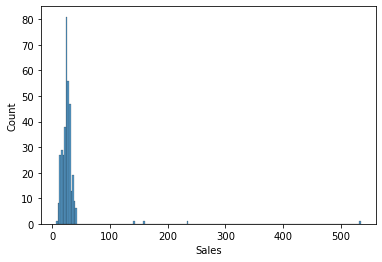

In [83]:
# Z scores greater than 3
for col in columns:
    print(col)
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    display(pd.DataFrame(z_scores))
    df['zscores'] = z_scores
    display(pd.DataFrame(df[df['zscores'].abs() >=3][col]))
    sns.histplot(df[col])
    plt.show();

**With z-score set at 3 outliers of temperature of 212 and a negative number of flyers should be removed. There is other outliers that show sales, rainfall outside of the z-score =3 , but it can be probable that this has occured.**